In [19]:
#!python
import numpy as np
from numpy import pi, sin, cos
from scipy import signal
import matplotlib.pyplot as plt

from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show



In [20]:
wave_duration = 3
sample_rate = 100
nyq_rate = sample_rate/2
q = 2


samples = wave_duration*sample_rate
samples_decimated = int(samples/q)


t = np.linspace(0, wave_duration, samples, endpoint=False)


attenuation = 0.5
base_freq = 3

f1 = base_freq
w1 = 2*pi*f1
print("Base freq: ", base_freq)
f2 = nyq_rate*0.9
w2 = 2*pi*f2
print("Second freq: ", f2)
f3 = nyq_rate*0.5
w3 = 2*pi*f3
print("Third freq: ", f3)


x = attenuation*cos(w1*t) + attenuation*0.5*sin(w2*t) +  attenuation* 0.25*sin(w3*t)

x_decimated = signal.decimate(x, q)

t_decimated = np.linspace(0, wave_duration, samples_decimated, endpoint=False)


Base freq:  3
Second freq:  45.0
Third freq:  25.0


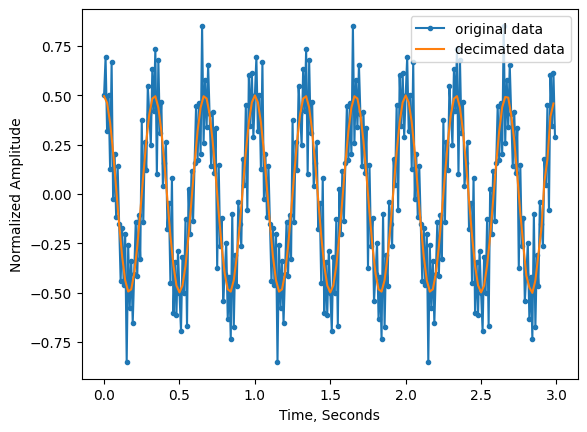

In [21]:
plt.plot(t, x, '.-', t_decimated, x_decimated)

plt.xlabel('Time, Seconds')
plt.ylabel('Normalized Amplitude')
plt.legend(['original data', 'decimated data'], loc='best')

plt.show()

In [22]:

K = np.size(x)
N = np.size(x)


dft_orig = np.zeros((K, N), dtype=np.complex128)
for n in range(N):
    for k in range(K):
        dft_orig[k, n] = np.exp(-2j * np.pi * k * n / N)


K_decimated = np.size(x_decimated)
N_decimated = np.size(x_decimated)


dft__decimated = np.zeros((K_decimated, N_decimated), dtype=np.complex128)
for n in range(N_decimated):
    for k in range(K_decimated):
        dft__decimated[k, n] = np.exp(-2j * np.pi * k * n / N_decimated)




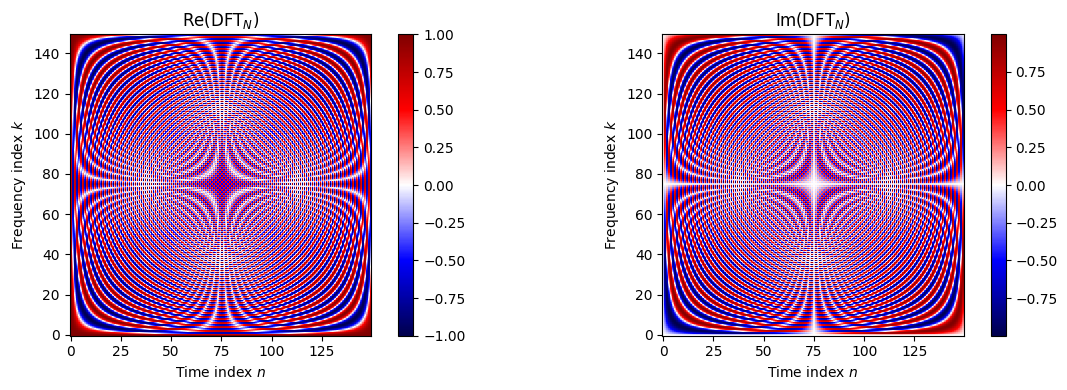

In [23]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.title('$\mathrm{Re}(\mathrm{DFT}_N)$')
plt.imshow(np.real(dft__decimated), origin='lower', cmap='seismic', aspect='equal')
plt.xlabel('Time index $n$')
plt.ylabel('Frequency index $k$')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title('$\mathrm{Im}(\mathrm{DFT}_N)$')
plt.imshow(np.imag(dft__decimated), origin='lower', cmap='seismic', aspect='equal')
plt.xlabel('Time index $n$')
plt.ylabel('Frequency index $k$')
plt.colorbar()
plt.tight_layout()

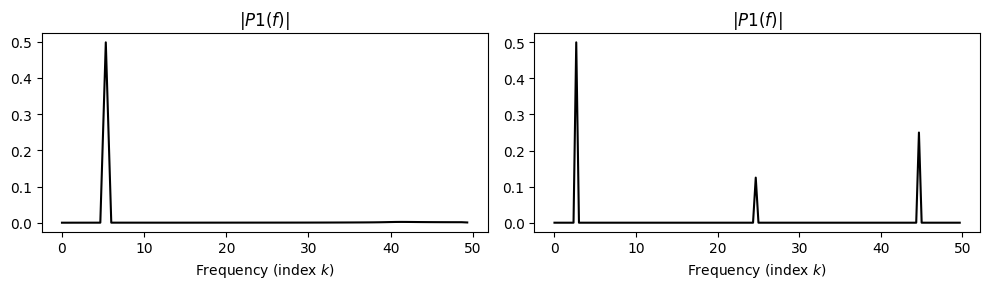

In [24]:
x = x.astype(np.complex128)
N = len(x)
N_decimated = len(x_decimated)

X = np.dot(dft_orig, x)
X_decimated = np.dot(dft__decimated, x_decimated)

P2 = np.abs(X/N)
P2_decimated = np.abs(X_decimated/N_decimated)
P1 = P2[1:int(N/2)+1]
P1_decimated = P2_decimated[1:int(N_decimated/2)+1]

P1[2:len(P1)-1] = 2*P1[2:len(P1)-1]
P1_decimated[2:len(P1_decimated)-1] = 2*P1_decimated[2:len(P1_decimated)-1]

f_ = sample_rate / N*np.arange(0, N/2)
f__decimated = sample_rate / N_decimated*np.arange(0, N_decimated/2)


plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.title('$|P1(f)|$')
plt.plot(f__decimated,P1_decimated, 'k')
plt.xlabel('Frequency (index $k$)')



plt.subplot(1, 2, 2)
plt.title('$|P1(f)|$')
plt.plot(f_,P1, 'k')
plt.xlabel('Frequency (index $k$)')
plt.tight_layout()

